In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Reading the Dataset

In [2]:
df_train = pd.read_csv(r'C:\Users\SARVESH\Documents\GitHub\home-credit-default\modified.csv')
df_test = pd.read_csv(r'C:\Users\SARVESH\Documents\My Tableau Repository\Datasources\credit_housing_test.csv')


In [3]:
df_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,REGION_POPULATION_RELATIVE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,ORGANIZATION_TYPE
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0.018801,1,1,0,1,1,0,Laborers,1,Business Entity Type 3
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0.003541,1,1,0,1,1,0,Core staff,2,School
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0.010032,1,1,1,1,1,0,Laborers,1,Government
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0.008019,1,1,0,1,0,0,Laborers,2,Business Entity Type 3
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0.028663,1,1,0,1,0,0,Core staff,1,Religion


In [4]:
df_test.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,REGION_POPULATION_RELATIVE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,ORGANIZATION_TYPE
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0.018850,1,1,0,1,0,1,NaN,2,Kindergarten
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0.035792,1,1,0,1,0,0,Low-skill Laborers,2,Self-employed
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0.019101,1,1,0,1,0,0,Drivers,2,Transport: type 3
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0.026392,1,1,0,1,1,0,Sales staff,4,Business Entity Type 3
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,0.010032,1,1,1,1,0,0,NaN,3,Business Entity Type 3


In [5]:
df_train = df_train.drop(['SK_ID_CURR'], axis = 1)

In [6]:
df_test = df_test.drop(['SK_ID_CURR'], axis = 1)

# Fixing the Nan values in the Dataset

In [7]:
import seaborn as sns

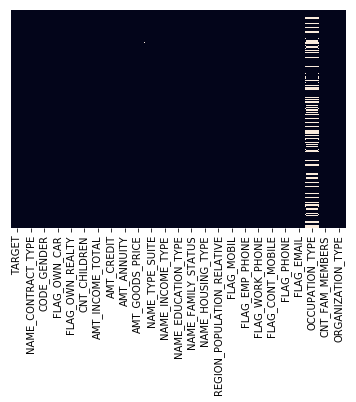

In [8]:
sns.heatmap(df_train.isnull(), yticklabels=False , cbar = False)

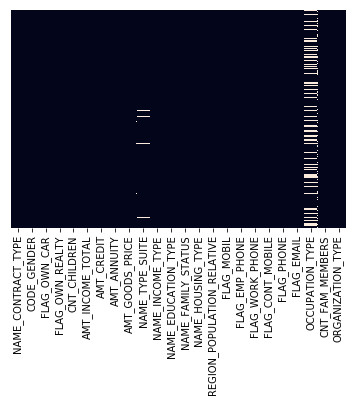

In [9]:
sns.heatmap(df_test.isnull(), yticklabels=False , cbar = False)

In [10]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19998 entries, 0 to 19997
Data columns (total 25 columns):
TARGET                        19998 non-null int64
NAME_CONTRACT_TYPE            19998 non-null object
CODE_GENDER                   19998 non-null object
FLAG_OWN_CAR                  19998 non-null object
FLAG_OWN_REALTY               19998 non-null object
CNT_CHILDREN                  19998 non-null int64
AMT_INCOME_TOTAL              19998 non-null float64
AMT_CREDIT                    19998 non-null float64
AMT_ANNUITY                   19998 non-null float64
AMT_GOODS_PRICE               19983 non-null float64
NAME_TYPE_SUITE               19915 non-null object
NAME_INCOME_TYPE              19998 non-null object
NAME_EDUCATION_TYPE           19998 non-null object
NAME_FAMILY_STATUS            19998 non-null object
NAME_HOUSING_TYPE             19998 non-null object
REGION_POPULATION_RELATIVE    19998 non-null float64
FLAG_MOBIL                    19998 non-null int64
FLAG_

In [11]:
df_train['OCCUPATION_TYPE']=df_train['OCCUPATION_TYPE'].fillna(df_train['OCCUPATION_TYPE'].mode()[0])
df_train['AMT_ANNUITY']= df_train['AMT_ANNUITY'].fillna(df_train['AMT_ANNUITY'].mean())
df_train['AMT_GOODS_PRICE']=df_train['AMT_GOODS_PRICE'].fillna(df_train['AMT_GOODS_PRICE'].mean())
df_train['NAME_TYPE_SUITE']=df_train['NAME_TYPE_SUITE'].fillna(df_train['NAME_TYPE_SUITE'].mode()[0])
df_train['CNT_FAM_MEMBERS']=df_train['CNT_FAM_MEMBERS'].fillna(df_train['CNT_FAM_MEMBERS'].mean())
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19998 entries, 0 to 19997
Data columns (total 25 columns):
TARGET                        19998 non-null int64
NAME_CONTRACT_TYPE            19998 non-null object
CODE_GENDER                   19998 non-null object
FLAG_OWN_CAR                  19998 non-null object
FLAG_OWN_REALTY               19998 non-null object
CNT_CHILDREN                  19998 non-null int64
AMT_INCOME_TOTAL              19998 non-null float64
AMT_CREDIT                    19998 non-null float64
AMT_ANNUITY                   19998 non-null float64
AMT_GOODS_PRICE               19998 non-null float64
NAME_TYPE_SUITE               19998 non-null object
NAME_INCOME_TYPE              19998 non-null object
NAME_EDUCATION_TYPE           19998 non-null object
NAME_FAMILY_STATUS            19998 non-null object
NAME_HOUSING_TYPE             19998 non-null object
REGION_POPULATION_RELATIVE    19998 non-null float64
FLAG_MOBIL                    19998 non-null int64
FLAG_

In [12]:
df_test['OCCUPATION_TYPE']=df_test['OCCUPATION_TYPE'].fillna(df_test['OCCUPATION_TYPE'].mode()[0])
df_test['AMT_ANNUITY']=df_test['AMT_ANNUITY'].fillna(df_test['AMT_ANNUITY'].mean())
df_test['AMT_GOODS_PRICE']=df_test['AMT_GOODS_PRICE'].fillna(df_test['AMT_GOODS_PRICE'].mean())
df_test['NAME_TYPE_SUITE']=df_test['NAME_TYPE_SUITE'].fillna(df_test['NAME_TYPE_SUITE'].mode()[0])
df_test['CNT_FAM_MEMBERS']=df_test['CNT_FAM_MEMBERS'].fillna(df_test['CNT_FAM_MEMBERS'].mean())
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48744 entries, 0 to 48743
Data columns (total 24 columns):
NAME_CONTRACT_TYPE            48744 non-null object
CODE_GENDER                   48744 non-null object
FLAG_OWN_CAR                  48744 non-null object
FLAG_OWN_REALTY               48744 non-null object
CNT_CHILDREN                  48744 non-null int64
AMT_INCOME_TOTAL              48744 non-null float64
AMT_CREDIT                    48744 non-null float64
AMT_ANNUITY                   48744 non-null float64
AMT_GOODS_PRICE               48744 non-null float64
NAME_TYPE_SUITE               48744 non-null object
NAME_INCOME_TYPE              48744 non-null object
NAME_EDUCATION_TYPE           48744 non-null object
NAME_FAMILY_STATUS            48744 non-null object
NAME_HOUSING_TYPE             48744 non-null object
REGION_POPULATION_RELATIVE    48744 non-null float64
FLAG_MOBIL                    48744 non-null int64
FLAG_EMP_PHONE                48744 non-null int64
FLAG_

In [13]:
df_train.head()

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,REGION_POPULATION_RELATIVE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,ORGANIZATION_TYPE
0,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,...,0.018801,1,1,0,1,1,0,Laborers,1,Business Entity Type 3
1,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,...,0.003541,1,1,0,1,1,0,Core staff,2,School
2,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,...,0.010032,1,1,1,1,1,0,Laborers,1,Government
3,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,...,0.008019,1,1,0,1,0,0,Laborers,2,Business Entity Type 3
4,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,...,0.028663,1,1,0,1,0,0,Core staff,1,Religion


# Feature Engineering ---Handling Categorical Features

In [14]:
df_train['FLAG_OWN_CAR'] = df_train['FLAG_OWN_CAR'].map(dict(Y=1,N=0))
df_train['FLAG_OWN_REALTY'] = df_train['FLAG_OWN_REALTY'].map(dict(Y=1,N=0))

In [15]:
df_train.head()

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,REGION_POPULATION_RELATIVE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,ORGANIZATION_TYPE
0,1,Cash loans,M,0,1,0,202500.0,406597.5,24700.5,351000.0,...,0.018801,1,1,0,1,1,0,Laborers,1,Business Entity Type 3
1,0,Cash loans,F,0,0,0,270000.0,1293502.5,35698.5,1129500.0,...,0.003541,1,1,0,1,1,0,Core staff,2,School
2,0,Revolving loans,M,1,1,0,67500.0,135000.0,6750.0,135000.0,...,0.010032,1,1,1,1,1,0,Laborers,1,Government
3,0,Cash loans,F,0,1,0,135000.0,312682.5,29686.5,297000.0,...,0.008019,1,1,0,1,0,0,Laborers,2,Business Entity Type 3
4,0,Cash loans,M,0,1,0,121500.0,513000.0,21865.5,513000.0,...,0.028663,1,1,0,1,0,0,Core staff,1,Religion


In [16]:
df_test['FLAG_OWN_CAR'] = df_test['FLAG_OWN_CAR'].map(dict(Y=1,N=0))
df_test['FLAG_OWN_REALTY'] = df_test['FLAG_OWN_REALTY'].map(dict(Y=1,N=0))

In [17]:
df_test.head()

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,...,REGION_POPULATION_RELATIVE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,ORGANIZATION_TYPE
0,Cash loans,F,0,1,0,135000.0,568800.0,20560.5,450000.0,Unaccompanied,...,0.018850,1,1,0,1,0,1,Laborers,2,Kindergarten
1,Cash loans,M,0,1,0,99000.0,222768.0,17370.0,180000.0,Unaccompanied,...,0.035792,1,1,0,1,0,0,Low-skill Laborers,2,Self-employed
2,Cash loans,M,1,1,0,202500.0,663264.0,69777.0,630000.0,Unaccompanied,...,0.019101,1,1,0,1,0,0,Drivers,2,Transport: type 3
3,Cash loans,F,0,1,2,315000.0,1575000.0,49018.5,1575000.0,Unaccompanied,...,0.026392,1,1,0,1,1,0,Sales staff,4,Business Entity Type 3
4,Cash loans,M,1,0,1,180000.0,625500.0,32067.0,625500.0,Unaccompanied,...,0.010032,1,1,1,1,0,0,Laborers,3,Business Entity Type 3


In [18]:
from sklearn.feature_extraction import DictVectorizer
vec = DictVectorizer(sparse = False , dtype = int)
dt11 = df_train.T.to_dict().values()
nd = vec.fit_transform(dt11)
df_train = pd.DataFrame(nd,columns = vec.get_feature_names())
df_train.head()

,AMT_ANNUITY,AMT_CREDIT,AMT_GOODS_PRICE,AMT_INCOME_TOTAL,CNT_CHILDREN,CNT_FAM_MEMBERS,CODE_GENDER=F,CODE_GENDER=M,FLAG_CONT_MOBILE,FLAG_EMAIL,...,ORGANIZATION_TYPE=Trade: type 6,ORGANIZATION_TYPE=Trade: type 7,ORGANIZATION_TYPE=Transport: type 1,ORGANIZATION_TYPE=Transport: type 2,ORGANIZATION_TYPE=Transport: type 3,ORGANIZATION_TYPE=Transport: type 4,ORGANIZATION_TYPE=University,ORGANIZATION_TYPE=XNA,REGION_POPULATION_RELATIVE,TARGET
0,24700,406597,351000,202500,0,1,0,1,1,0,...,0,0,0,0,0,0,0,0,0,1
1,35698,1293502,1129500,270000,0,2,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,6750,135000,135000,67500,0,1,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
3,29686,312682,297000,135000,0,2,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,21865,513000,513000,121500,0,1,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0


In [19]:
df_train.to_csv(r'C:\Users\SARVESH\Documents\My Tableau Repository\Datasources\transform_train.csv',encoding='utf-8', index=False)

In [20]:
dt12 = df_test.T.to_dict().values()
nd = vec.fit_transform(dt12)
df_test = pd.DataFrame(nd,columns = vec.get_feature_names())
df_test.head()

,AMT_ANNUITY,AMT_CREDIT,AMT_GOODS_PRICE,AMT_INCOME_TOTAL,CNT_CHILDREN,CNT_FAM_MEMBERS,CODE_GENDER=F,CODE_GENDER=M,FLAG_CONT_MOBILE,FLAG_EMAIL,...,ORGANIZATION_TYPE=Trade: type 5,ORGANIZATION_TYPE=Trade: type 6,ORGANIZATION_TYPE=Trade: type 7,ORGANIZATION_TYPE=Transport: type 1,ORGANIZATION_TYPE=Transport: type 2,ORGANIZATION_TYPE=Transport: type 3,ORGANIZATION_TYPE=Transport: type 4,ORGANIZATION_TYPE=University,ORGANIZATION_TYPE=XNA,REGION_POPULATION_RELATIVE
0,20560,568800,450000,135000,0,2,1,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,17370,222768,180000,99000,0,2,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
2,69777,663264,630000,202500,0,2,0,1,1,0,...,0,0,0,0,0,1,0,0,0,0
3,49018,1575000,1575000,315000,2,4,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,32067,625500,625500,180000,1,3,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
df_test.to_csv(r'C:\Users\SARVESH\Documents\My Tableau Repository\Datasources\transform_test.csv',encoding='utf-8', index=False)

# Feature Engineering --Handling Imbalanced Dataset

In [22]:
df_train['TARGET'].value_counts()

0    18420
1     1578
Name: TARGET, dtype: int64

In [23]:
from sklearn.utils import resample

In [24]:
#seperate majority and minority class
df_majority = df_train[df_train.TARGET == 0]
df_minority = df_train[df_train.TARGET == 1]

#Upsample the minority class
df_minority_upsampled = resample(df_minority,
                                replace =True,
                                n_samples =18420,
                                random_state = 123)
#Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_majority ,df_minority_upsampled])

#Display the new class counts
df_upsampled.TARGET.value_counts()

1    18420
0    18420
Name: TARGET, dtype: int64

# Scaling the Data

In [25]:
from sklearn.preprocessing import StandardScaler

In [26]:
df_test = df_upsampled.TARGET
df_train = df_upsampled.drop('TARGET' , axis = 1)

In [27]:
scaler = StandardScaler()
scaler.fit(df_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int32 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)


StandardScaler(copy=True, with_mean=True, with_std=True)

In [28]:
scaled_data = scaler.transform(df_train)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype int32 were all converted to float64 by StandardScaler.
  """Entry point for launching an IPython kernel.


# Dimension Reduction Technique --PCA

In [29]:
from sklearn.decomposition import PCA

In [30]:
pca = PCA(n_components = 2)

In [31]:
pca.fit(scaled_data)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [32]:
x_pca = pca.transform(scaled_data)

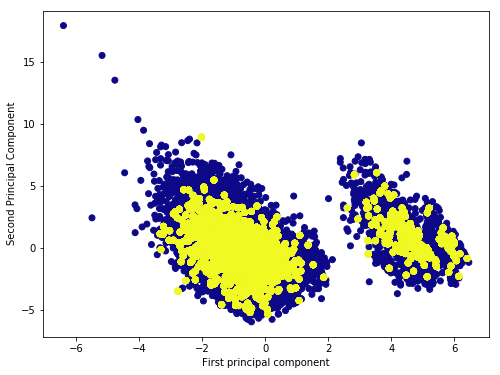

In [33]:
plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0],x_pca[:,1],c=df_upsampled['TARGET'],cmap='plasma')
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')
plt.show()

# Fitting with Logistic Regression

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [35]:
df = pd.DataFrame(scaled_data)

In [36]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,114,115,116,117,118,119,120,121,122,123
0,0.633702,1.908642,1.786630,0.028363,-0.605488,-0.200741,0.795600,-0.795600,0.038314,-0.252074,...,-0.021486,-0.038314,-0.161283,-0.018788,-0.097654,-0.063295,-0.121853,-0.051645,-0.423611,0.0
1,-1.499960,-1.192285,-1.116930,-0.063838,-0.605488,-1.249573,-1.256914,1.256914,0.038314,-0.252074,...,-0.021486,-0.038314,-0.161283,-0.018788,-0.097654,-0.063295,-0.121853,-0.051645,-0.423611,0.0
2,0.190577,-0.716689,-0.643952,-0.033105,-0.605488,-0.200741,0.795600,-0.795600,0.038314,-0.252074,...,-0.021486,-0.038314,-0.161283,-0.018788,-0.097654,-0.063295,-0.121853,-0.051645,-0.423611,0.0
3,-0.385883,-0.180504,-0.013315,-0.039252,-0.605488,-1.249573,-1.256914,1.256914,0.038314,-0.252074,...,-0.021486,-0.038314,-0.161283,-0.018788,-0.097654,-0.063295,-0.121853,-0.051645,-0.423611,0.0
4,0.030708,-0.240742,-0.184112,-0.049496,-0.605488,-0.200741,-1.256914,1.256914,0.038314,-0.252074,...,-0.021486,-0.038314,-0.161283,-0.018788,-0.097654,-0.063295,-0.121853,-0.051645,-0.423611,0.0


In [37]:
Xtrain , Xtest,ytrain ,ytest = train_test_split(x_pca,df_test,random_state = 1)

In [38]:
Xtrain.shape

(27630, 2)

In [39]:
Xtest.shape

(9210, 2)

In [40]:
#train model
model= LogisticRegression()
model.fit(Xtrain,ytrain)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [41]:
y_model = model.predict(Xtest)

In [42]:
accuracy_score(ytest,y_model)

0.5661237785016286

# SVM Model

In [43]:
from sklearn.svm import SVC

In [44]:
clf = SVC(kernel = 'linear' , C=1E0)
clf.fit(Xtrain,ytrain)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [45]:
y_model = clf.predict(Xtest)



In [46]:
accuracy_score(ytest , y_model)

0.5359391965255157

# xgboost

In [48]:
## Hyper Parameter Optimization

params={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
    
}

In [49]:

## Hyperparameter optimization using RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV
import xgboost
classifier=xgboost.XGBClassifier()
random_search=RandomizedSearchCV(classifier,param_distributions=params,n_iter=5,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3)
random_search.fit(Xtrain,ytrain)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  19 out of  25 | elapsed:   17.5s remaining:    5.5s
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:   19.1s finished


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
          estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
       subsample=1, verbosity=1),
          fit_params=None, iid='warn', n_iter=5, n_jobs=-1,
          param_distributions={'learning_rate': [0.05, 0.1, 0.15, 0.2, 0.25, 0.3], 'max_depth': [3, 4, 5, 6, 8, 10, 12, 15], 'min_child_weight': [1, 3, 5, 7], 'gamma': [0.0, 0.1, 0.2, 0.3, 0.4], 'colsample_bytree': [0.3, 0.4, 0.5, 0.7]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring='roc_auc', verbose=3)

In [50]:
random_search.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=0.3, gamma=0.1,
       learning_rate=0.15, max_delta_step=0, max_depth=10,
       min_child_weight=3, missing=None, n_estimators=100, n_jobs=1,
       nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=None, subsample=1, verbosity=1)

In [51]:
random_search.best_params_

{'min_child_weight': 3,
 'max_depth': 10,
 'learning_rate': 0.15,
 'gamma': 0.1,
 'colsample_bytree': 0.3}

In [52]:
classifier=xgboost.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.3, gamma=0.1, learning_rate=0.15,
       max_delta_step=0, max_depth=10, min_child_weight=3, missing=None,
       n_estimators=100, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
       subsample=1)

In [53]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(classifier,Xtest,ytest,cv=10)

In [54]:
score

array([0.73210412, 0.70792617, 0.70466884, 0.7111835 , 0.70141151,
       0.68186754, 0.69923996, 0.70901194, 0.67318132, 0.69130435])

In [55]:
score.mean()

0.7011899240202336